---
author: Krtin Juneja (KJUNEJA@falcon.bentley.edu)
---

We load here the same data that appears in the solution for how to perform pairwise comparisons. That solution determined which pairs of groups have significant differences in their means; follow its link for more details.

In [1]:
from rdatasets import data
df = data('InsectSprays')
df.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


We now want to perform a unplanned comparison test on the data to determine the magnitudes of the differences between pairs of groups. We do this by applying "Tukey’s HSD" approach to perform pairwise comparisons and generate confidence intervals that maintain a specified experiment-wise error rate. Before that, the `pairwise_tukeyhsd` module needs to be imported from the `statsmodels` package.

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['count'], groups=df['spray'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   0.8333    0.9  -3.8659  5.5326  False
     A      C -12.4167  0.001 -17.1159 -7.7174   True
     A      D  -9.5833  0.001 -14.2826 -4.8841   True
     A      E    -11.0  0.001 -15.6992 -6.3008   True
     A      F   2.1667  0.728  -2.5326  6.8659  False
     B      C   -13.25  0.001 -17.9492 -8.5508   True
     B      D -10.4167  0.001 -15.1159 -5.7174   True
     B      E -11.8333  0.001 -16.5326 -7.1341   True
     B      F   1.3333    0.9  -3.3659  6.0326  False
     C      D   2.8333 0.4921  -1.8659  7.5326  False
     C      E   1.4167    0.9  -3.2826  6.1159  False
     C      F  14.5833  0.001   9.8841 19.2826   True
     D      E  -1.4167    0.9  -6.1159  3.2826  False
     D      F    11.75  0.001   7.0508 16.4492   True
     E      F  13.1667  0.001   8.4674 17.8659   True
----------------------------

Because the above table contains a lot of information, it's often helpful to visualize these intervals.
Python's `statsmodels` package does not have a built-in way to do so, but we can create our own as follows.

/opt/conda/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


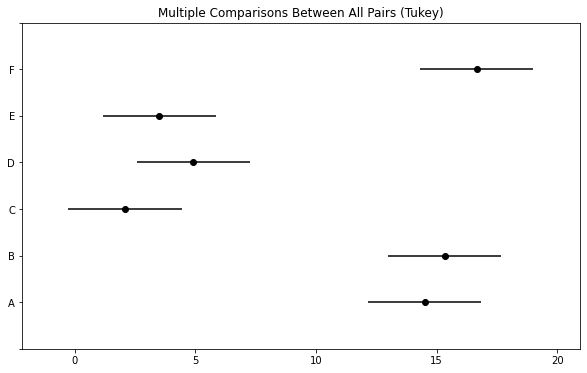

In [5]:
import matplotlib.pyplot as plt
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()